### Boston **house prediction**
### What we are going to do ?
### We have house data of **Boston areas?**
### We will going to develop **machine learning** model which will help to predict **the price** of the Boston areas

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn  import metrics 
 


In [10]:
# Importing the boston housing datase 
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
# Initializing the dataframe 
data = pd.DataFrame(boston.data)

In [12]:
# see the head of the data 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Additing the features name to data 
# in the data you can see first row is denoted with o, 1,2,3,4,5,...
# These row number need to change with features of the data
# In the simple term can call character 
# let me elobrate for new comer ( data having different feautres , suppose you collect the data for houisng )..
# Housing data based on the different features i.e urban  , rural , convenenient places ...many more these are 
# Features , hope you have understand 
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#####CRIM per capita crime rate by town


#####ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#####INDUS proportion of non-retail business acres per town
#####CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#####NOX nitric oxides concentration (parts per 10 million)
#####RM average number of rooms per dwelling
#####AGE proportion of owner-occupied units built prior to 1940
#####DIS weighted distances to five Boston employment centres
#####RAD index of accessibility to radial highways
#####TAX full-value property-tax rate per 10,000usd
#####PTRATIO pupil-teacher ratio by town
#####B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#####LSTAT % lower status of the population

In [18]:
# Adding the target variables
data["price"]=boston.target

In [20]:
# check the shape of dataframe
data.shape

(506, 14)

In [21]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [22]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [23]:
# Identify the unique number of values in dataset 
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [24]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [25]:
# see row with missing values 
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price


In [27]:
# viewing the statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
# finding out the correlation between the features 
corr =data.corr()
corr.shape 

(14, 14)

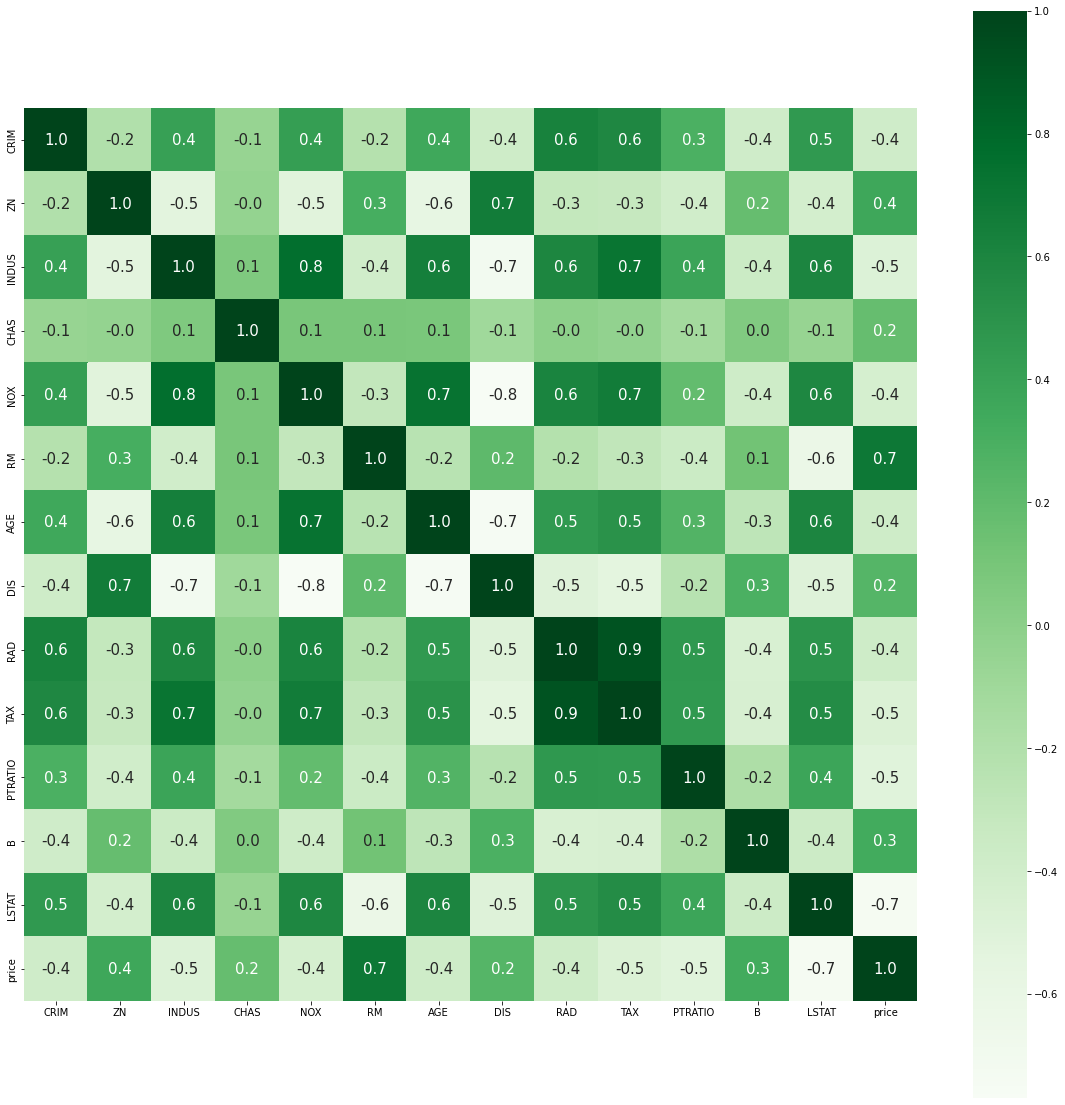

In [30]:
# plotting the heatmap correlation between features 
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True, fmt='.1f', annot=True,annot_kws={'size':15},cmap='Greens' )